In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rtlsdr import RtlSdr


F_offset = int(0.5e6)
F_station = int(95.9e6)
Fc = F_station - F_offset
Fs = int(2.8e6)
sdr = RtlSdr()
sdr.set_gain('auto')
sdr.set_agc_mode(False)
sdr.set_center_freq(Fc)
sdr.set_freq_correction(66)
sdr.set_sample_rate(Fs)

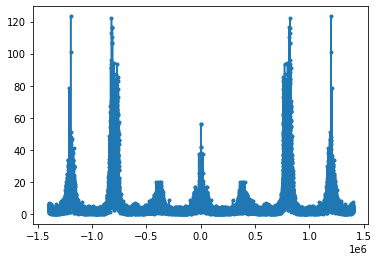

In [59]:
samples = sdr.read_samples(2**14)

S = np.fft.fftshift(np.fft.fft(np.abs(samples))[1:])
t = np.arange(len(S))
f = np.arange(Fs/-2, Fs/2, Fs/len(S))
S_mag = np.abs(S)
plt.plot(f,S_mag,'.-')